# Paper Results Notebook
This notebook is intended to help users replicate the results included in the paper. It also demonstrates how to set up a variaty of different types of problems. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import shutil
from tqdm.autonotebook import tqdm, trange
import itertools
import pandas as pd
import sklearn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score


import importlib
import evaluation
import load_data
import Padgan_variants
import VAEs
import utils

importlib.reload(evaluation)
importlib.reload(load_data)
importlib.reload(VAEs)
importlib.reload(Padgan_variants)
importlib.reload(utils)

C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\2801743236.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


<module 'utils' from 'C:\\Users\\Lyle\\Documents\\Files\\DeCoDE\\DGM-Evaluation-Metrics\\utils.py'>

**General Settings**

In [2]:
numgen = 1000 #Number of samples to generate
numinst = 1 #Number of instantiations to test
scaling = True #Scale or not
scorebars = True #Print progress bars for scoring functions

np.random.seed(0)

**Similarity**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\1574470885.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\1574470885.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 0.7183 - reconstruction_loss: 0.3579 - kl_loss: 2.3863
Epoch 2/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2295 - reconstruction_loss: 0.0673 - kl_loss: 3.0596
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1926 - reconstruction_loss: 0.0514 - kl_loss: 2.7180
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1820 - reconstruction_loss: 0.0482 - kl_loss: 2.6449
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1754 - reconstruction_loss: 0.0471 - kl_loss: 2.5642
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1722 - reconstruction_loss: 0.0442 - kl_loss: 2.5580
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1718 - reconstruction_loss: 0.0453 - kl_loss: 2.5139
Epoch 8/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1677 - reconstruction_loss: 0

Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.87it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  3.03it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.92it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.82it/s]


Calculating Maximum Mean Discrepancy
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.69it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.88it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.70it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:03<00:00,  2.71it/s]


Calculating Maximum Mean Discrepancy
Calculating ML Efficacy


Problem 1 Scores:,GAN,VAE
Nearest Dataset Sample,0.016629,0.043744
Nearest Generated Sample,0.086007,0.097870
Rediscovery,0.085360,0.058467
F1,0.476302,0.484993
F10,0.913179,0.895878
F0.1,0.794618,0.741919
AUC-PR,0.500548,0.488519
MMD,0.005583,0.053813
ML Efficacy,0.838912,0.763476


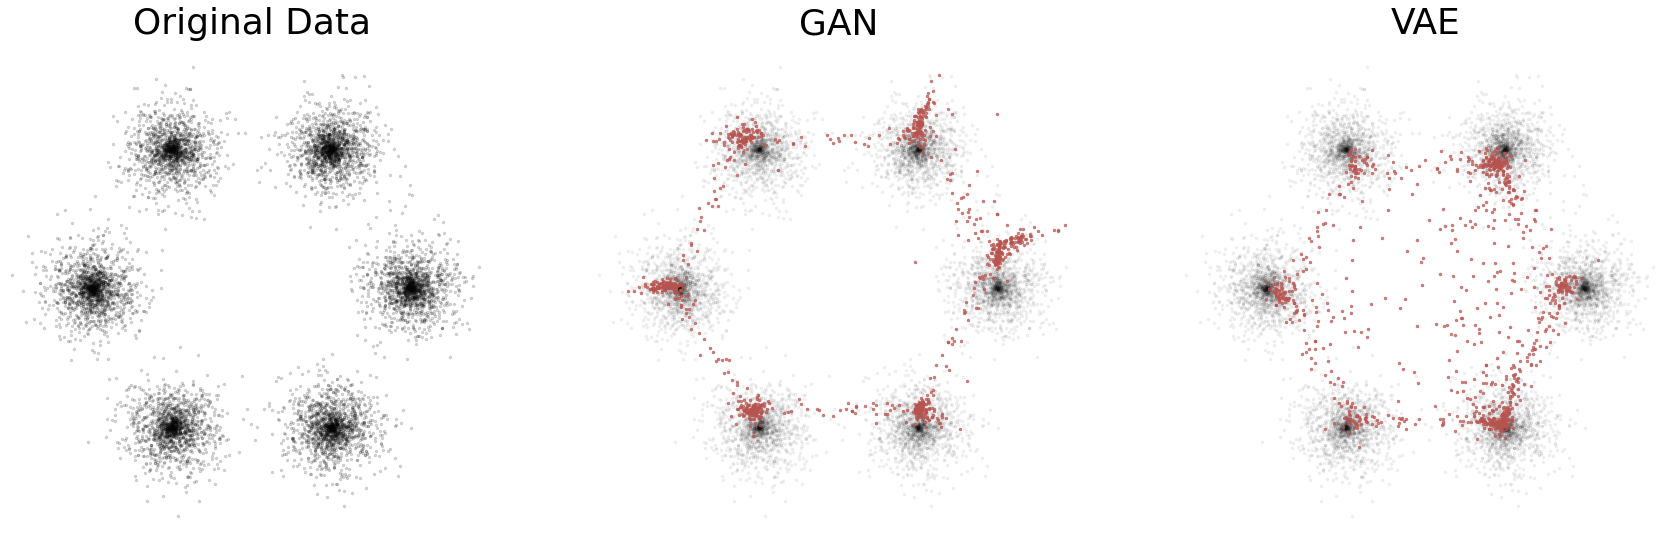

In [3]:
functions=[]

DM_val = load_data.all_val_wrapper()

#In this case, we include objectives specifically for ML efficacy
DM_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 

pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples

rangearr = np.array([[-2,2], [-2,2]])
functions.append([sampling_func, DM_val, DM_objs, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([100, 128, 1e-3, 4, .05, False])

metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]

#Rediscovery needs special handling in the utils file. 
#We pass in a special flag: "Rediscovery" to trigger this handling. See utils file for more info
metrics["Rediscovery"] = ["minimize", "Rediscovery", evaluation.data_gen_distance_wrapper("x", "min")]
holdout = 0.05 #If using rediscovery, we need to hold out a portion of the data during training

metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper('x')]
metrics["ML Efficacy"] = ["maximize", evaluation.ML_efficacy_wrapper(KNeighborsRegressor(n_neighbors=5), r2_score)]

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

#fit and generate
timestr = utils.fit_and_generate(functions, methods, numinst, numgen, scaling, obj_status, conditional_status, holdout)
# or load pre-generated data, e.g.: timestr = "20230212-150132"
utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "red")

**Diversity**

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\1145826831.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\1145826831.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 9ms/step - loss: 0.7276 - reconstruction_loss: 0.3498 - kl_loss: 2.2235
Epoch 2/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1944 - reconstruction_loss: 0.0525 - kl_loss: 2.8019
Epoch 3/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1880 - reconstruction_loss: 0.0494 - kl_loss: 2.7134
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1801 - reconstruction_loss: 0.0470 - kl_loss: 2.6368
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1779 - reconstruction_loss: 0.0471 - kl_loss: 2.5865
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1735 - reconstruction_loss: 0.0451 - kl_loss: 2.5538
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1724 - reconstruction_loss: 0.0458 - kl_loss: 2.5065
Epoch 8/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1683 - reconstruction_loss: 0

Problem 1 Scores:,GAN,VAE
Inter-Generated Sample,0.027774,0.030178
Convex Hull,10.394809,5.689620
DPP Diversity,14.473327,14.415661
Nearest Generated Sample,0.066351,0.094264
Distance to Centroid,1.543934,1.121575


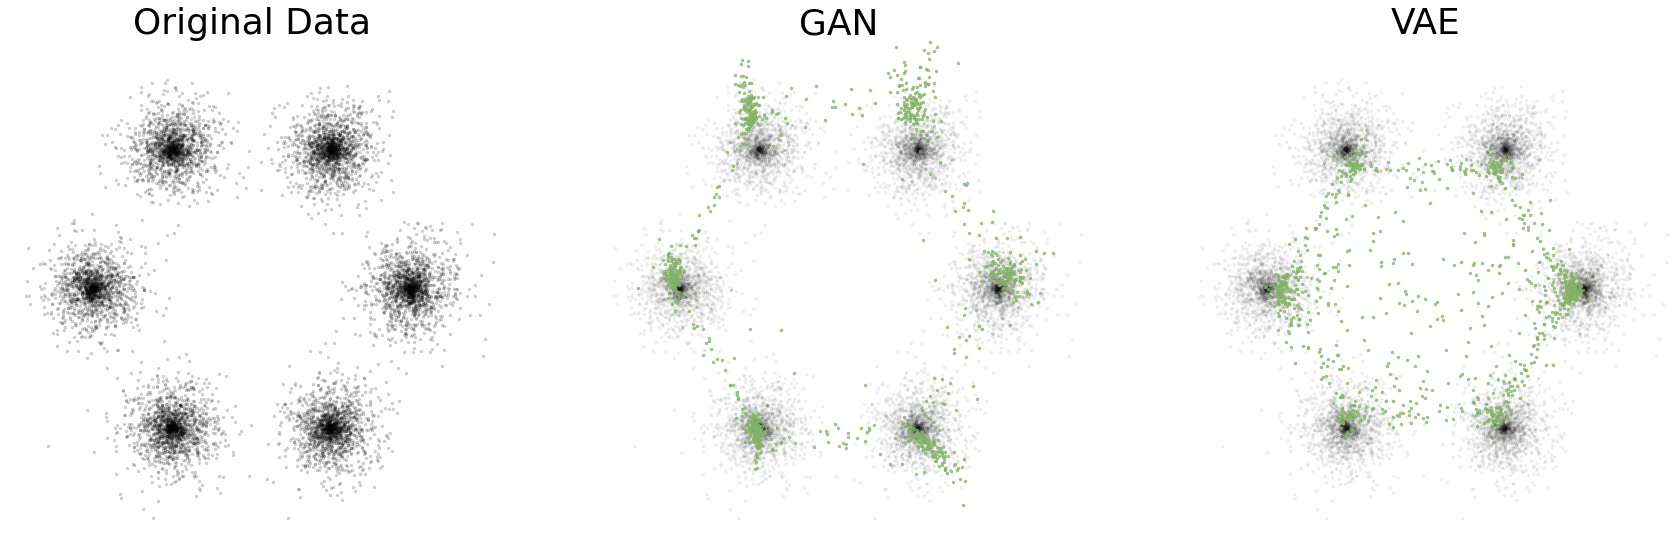

In [4]:
functions=[]

DM_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples

rangearr = np.array([[-2,2], [-2,2]])
functions.append([sampling_func, DM_val, None, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([100, 128, 1e-3, 4, .05, False])


metrics=pd.Series()
metrics["Inter-Generated Sample"] = ["maximize", evaluation.gen_gen_distance_wrapper("x", "min")]
metrics["Convex Hull"] = ["maximize", evaluation.convex_hull_wrapper("x")]
metrics["DPP Diversity"] = ["minimize", evaluation.DPP_diversity_wrapper("x")]
metrics["Nearest Generated Sample"] = ["maximize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["Distance to Centroid"] = ["maximize", evaluation.distance_to_centroid_wrapper("x")]


validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

timestr = utils.fit_and_generate(functions, methods, numinst, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "green")

**Constraint Adherence**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\2089715537.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\2089715537.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.7620 - reconstruction_loss: 0.4050 - kl_loss: 2.3094
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 0.2700 - reconstruction_loss: 0.0933 - kl_loss: 3.3511
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.2246 - reconstruction_loss: 0.0647 - kl_loss: 3.0075
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.2028 - reconstruction_loss: 0.0560 - kl_loss: 2.9272
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.2027 - reconstruction_loss: 0.0544 - kl_loss: 2.9242
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1981 - reconstruction_loss: 0.0536 - kl_loss: 2.8956
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1979 - reconstruction_loss: 0.0529 - kl_loss: 2.8809
Epoch 8/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1973 - reconstruction_loss: 0

Problem 1 Scores:,GAN,VAE
Predicted Constraint Satisfaction,0.837800,0.760400
Validity,0.829000,0.747000
Nearest Invalid Sample,0.183015,0.181718


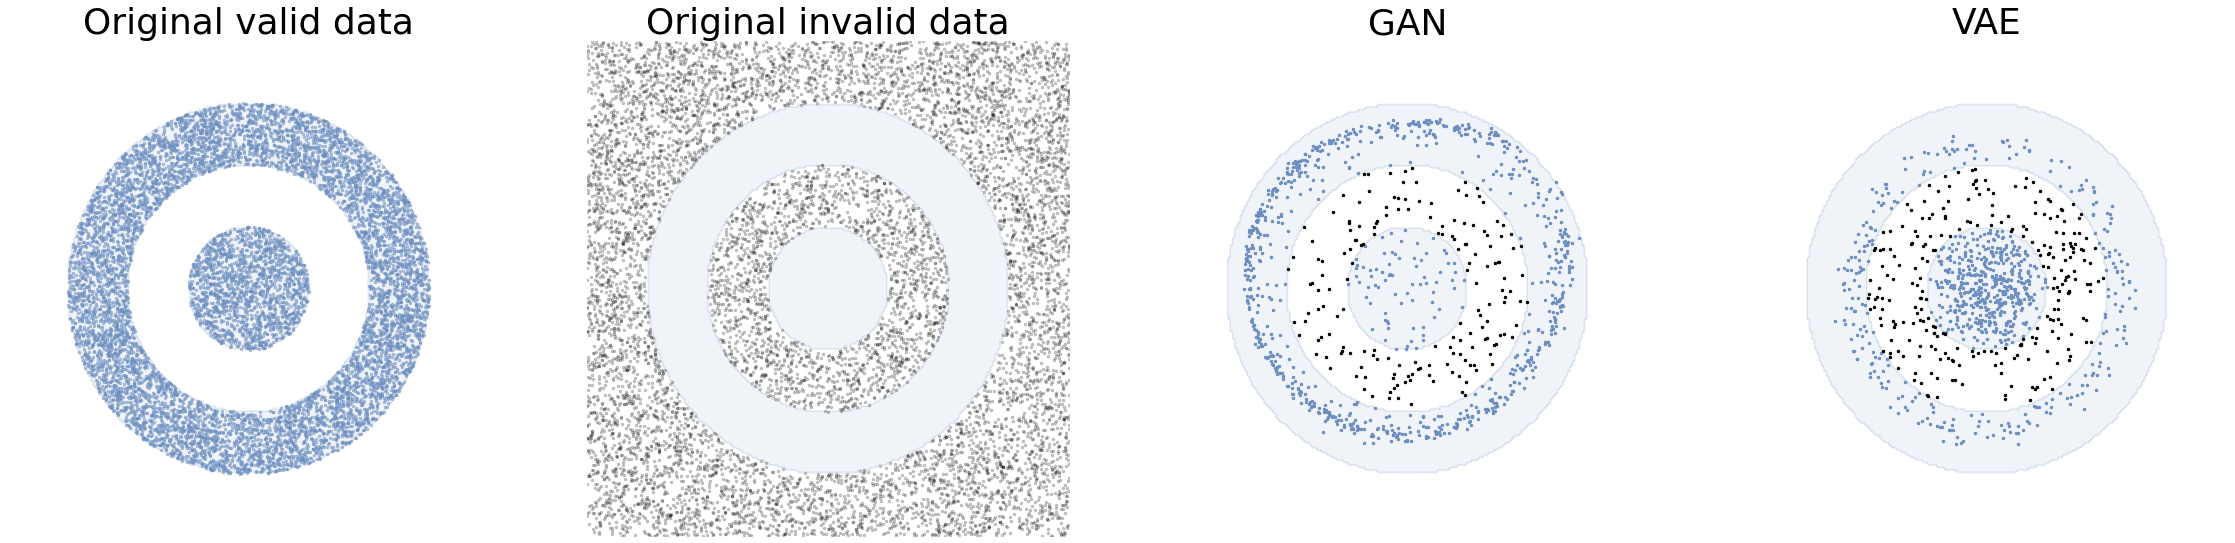

In [5]:
functions=[]

sampling_func_2 = load_data.sample_uniform_wrapper(10000, 10000) #Uniform Sampling with Number of positive samples & Negative Samples
validity_func_2 = load_data.concentric_circles_val_wrapper(2)
rangearr_2 = np.array([[-1,1], [-1,1]])
functions.append([sampling_func_2, validity_func_2, None, rangearr_2, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([100, 128, 1e-3, 4, .05, False])


metrics=pd.Series()
metrics["Predicted Constraint Satisfaction"] = ["maximize", evaluation.predicted_constraint_satisfaction_wrapper(KNeighborsClassifier(n_neighbors=5))]
metrics["Validity"] = ["maximize", "Validity"] #Validity is handled specially in utils
metrics["Nearest Invalid Sample"] = ["maximize", evaluation.gen_neg_distance_wrapper("min")]


validity_status = 1 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

timestr = utils.fit_and_generate(functions, methods, numinst, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "blue")

**Performance and Target Achievement**

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\3861914365.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\3861914365.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

No regressor provided! Fitting DNN Regressor using provided Parameters...
Epoch 1/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0333 - MSE: 0.0333 - val_loss: 0.0094 - val_MSE: 0.0094
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0145 - MSE: 0.0145 - val_loss: 0.0075 - val_MSE: 0.0075
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0126 - MSE: 0.0126 - val_loss: 0.0073 - val_MSE: 0.0073
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0116 - MSE: 0.0116 - val_loss: 0.0072 - val_MSE: 0.0072
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0112 - MSE: 0.0112 - val_loss: 0.0073 - val_MSE: 0.0073
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0104 - MSE: 0.0104 - val_loss: 0.0071 - val_MSE: 0.0071
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0102 - MSE: 0.0102 - val_loss: 0.0071 - val_MSE: 0.

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Calculating DTAI
Calculating Hypervolume
Calculating Generational Distance
Calculating Weighted Target Success Rate
Calculating DTAI
Calculating Hypervolume
Calculating Generational Distance
Calculating Weighted Target Success Rate


Problem 1 Scores:,GAN,MO-PaDGAN
DTAI,0.328527,0.397725
Hypervolume,0.537445,0.617614
Generational Distance,0.203242,0.268412
Weighted Target Success Rate,0.205500,0.305500
Signed Distance to Target,-0.276146,-0.196809


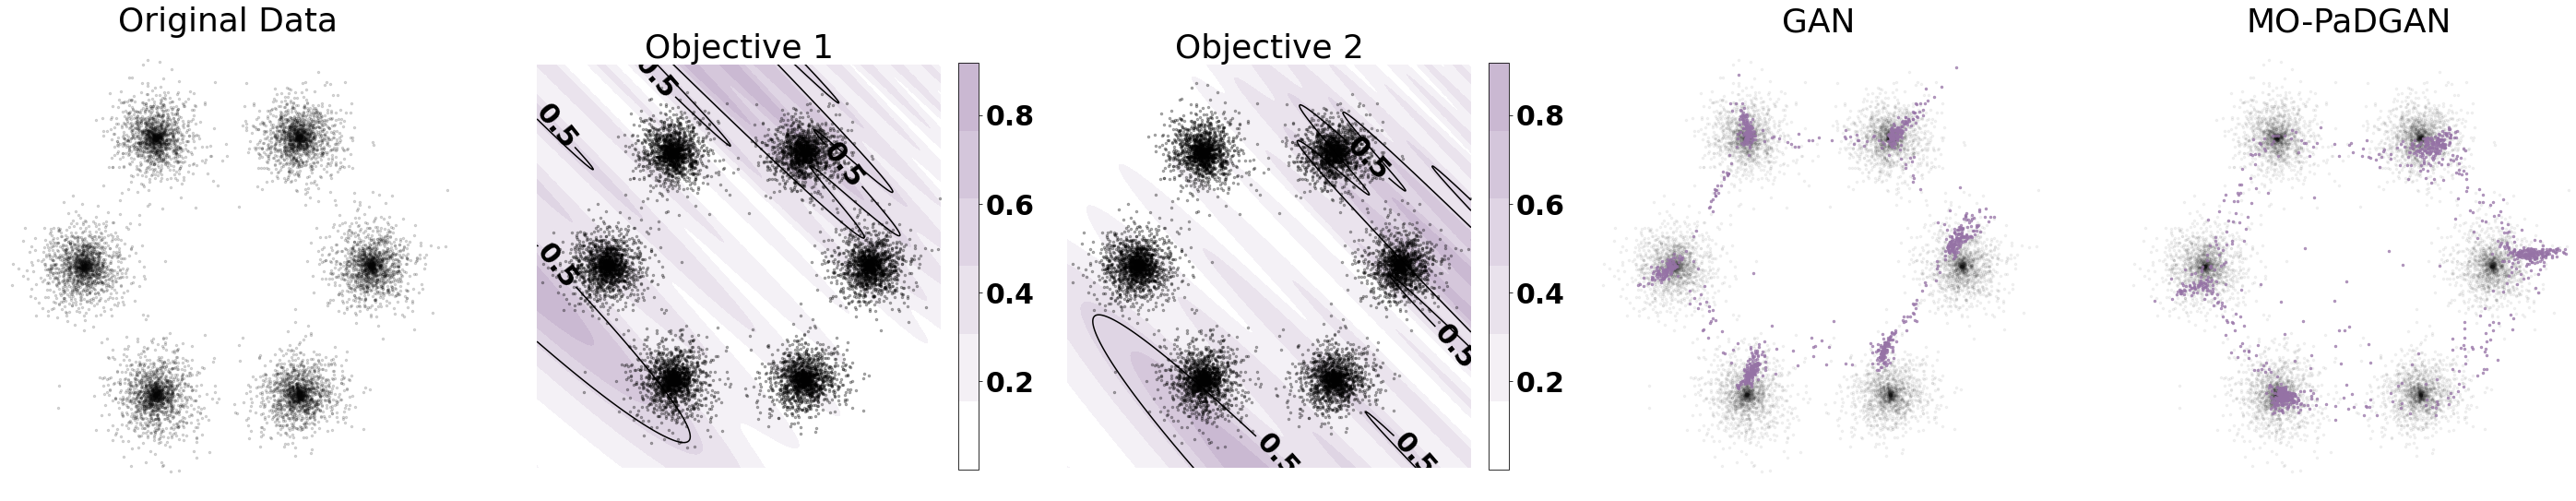

In [6]:
functions=[]

Perf_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples
Perf_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 
rangearr = np.array([[-2,2], [-2,2]])
functions.append([sampling_func, Perf_val, Perf_objs, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)

# Regressor/Classifier params: [dropout, layers, layersize, batchnorm, activation, patience, lr, batchsize, epochs]
reg_clf_params = [0.1, 2, 100, True, "Leaky ReLU", 30, 1e-4, 32, 100]
config_params = [False, False, False, "auto", "auto", False]
train_params = [5, 2, 4, 5000]
DTAI_params= ["auto", "auto", "auto"]
methods["MO-PaDGAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)

metrics=pd.Series()
target = np.array([0.5, 0.5])
a_ = np.array([1, 1])
p_ = np.array([1, 1])
direction = "maximize" #Whether to maximize or minimize the objective function. Not to be confused with whether evaluation metrics are best maximized or minimized!
metrics["DTAI"] = ["maximize", evaluation.DTAI_wrapper(direction, target, a_, p_)]
metrics["Hypervolume"] = ["maximize", evaluation.Hypervolume_wrapper()]
metrics["Generational Distance"] = ["minimize", evaluation.Generational_distance_wrapper(pareto)]
metrics["Weighted Target Success Rate"] = ["maximize", evaluation.weighted_target_success_rate_wrapper(direction, target, p_)]
metrics["Signed Distance to Target"] = ["maximize", evaluation.signed_distance_to_boundary_wrapper(direction, target, a_)]


validity_status = 0 #whether we are considering constraints
obj_status = 1 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution
plotobjs = target

timestr = utils.fit_and_generate(functions, methods, numinst, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "purple", plotobjs)

**Conditioning**

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\3302676230.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_43684\3302676230.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6949 - reconstruction_loss: 0.3251 - kl_loss: 2.3157
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1960 - reconstruction_loss: 0.0540 - kl_loss: 2.6511
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1696 - reconstruction_loss: 0.0455 - kl_loss: 2.4211
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1617 - reconstruction_loss: 0.0418 - kl_loss: 2.3434
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1554 - reconstruction_loss: 0.0396 - kl_loss: 2.2544
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1502 - reconstruction_loss: 0.0373 - kl_loss: 2.2360
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1471 - reconstruction_loss: 0.0359 - kl_loss: 2.2188
Epoch 8/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1426 - reconstruction_loss: 0

Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.52it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.67it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.67it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.55it/s]


Calculating Maximum Mean Discrepancy
Calculating predicted_constraint_satisfaction
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.47it/s]


Calculating F10


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.49it/s]


Calculating F0.1


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.61it/s]


Calculating AUC


Calculating Precision/Recall:: 100%|===================================================| 10/10 [00:01<00:00,  6.49it/s]

Calculating Maximum Mean Discrepancy
Calculating predicted_constraint_satisfaction


Problem 1 Scores:,cGAN,cVAE
Nearest Dataset Sample,0.098521,0.100908
Nearest Generated Sample,0.043042,0.079891
F1,0.432642,0.583962
F10,0.829846,0.861416
F0.1,0.904027,0.803691
AUC-PR,0.440677,0.591167
MMD,0.065270,0.059134
Conditioning Reconstruction,0.013990,0.008570
Conditioning Adherence,0.014209,0.010029


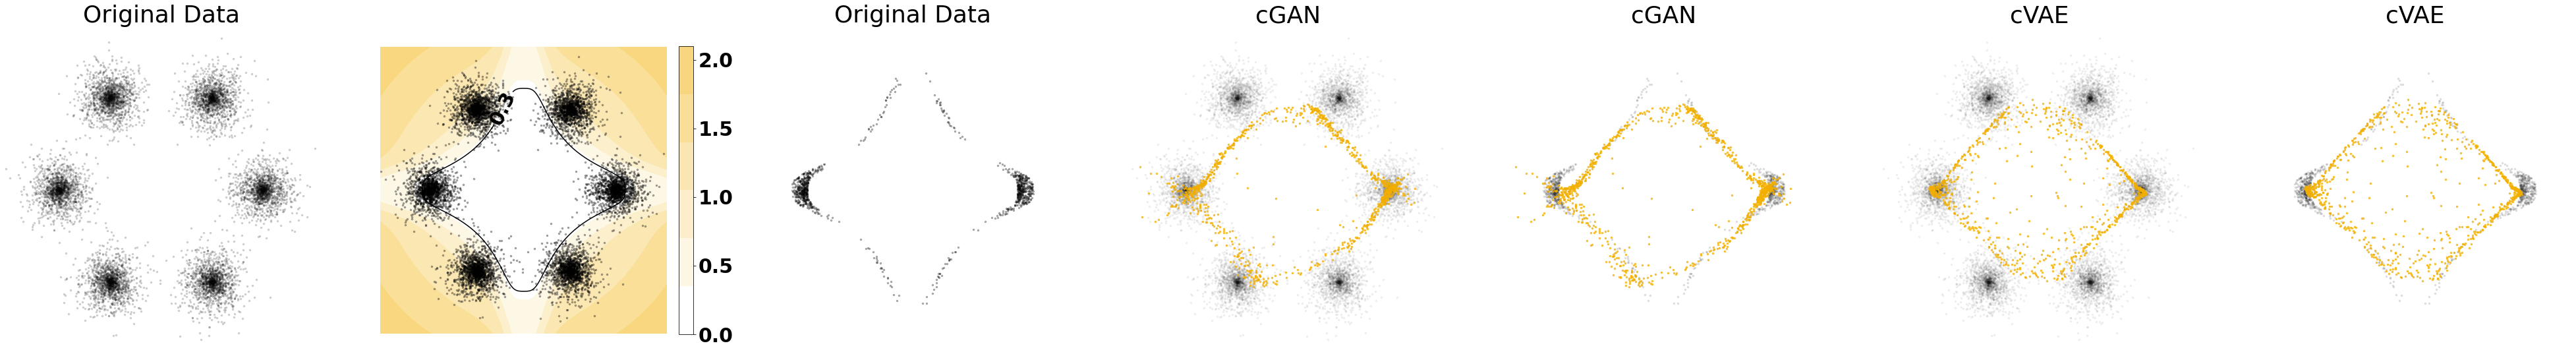

In [7]:
#Note: only continuous conditioning is currently supported

importlib.reload(load_data)
# importlib.reload(GANs)
importlib.reload(VAEs)

functions=[]

DM_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples
rangearr = np.array([[-2,2], [-2,2]])
cond_func = load_data.exp_obj_wrapper(1,1)
cond=0.3
functions.append([sampling_func, DM_val, None, rangearr, cond_func, cond])


reg_clf_params = None
config_params_cond = [False, False, False, None, None, True]
train_params = [1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["cGAN"] = Padgan_variants.padgan_wrapper(config_params_cond, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["cVAE"] = VAEs.VAE_wrapper([100, 128, 1e-3, 4, .05, True])

metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper('x')]

#Conditioning Reconstruction and Adherence needs special handling in the utils file. We pass in their respective flags as follows:
metrics["Conditioning Reconstruction"] = ["maximize", "Conditioning Reconstruction", evaluation.predicted_conditioning_wrapper(KNeighborsRegressor(n_neighbors=5), cond)]
metrics["Conditioning Adherence"] = ["maximize", "Conditioning Adherence"]

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 1 #whether we are considering conditioning
cond_dist=True #Whether conditional metrics are compared against conditional or marginal distribution


#Generate a new set of results
timestr = utils.fit_and_generate(functions, methods, numinst, numgen, scaling, obj_status, conditional_status, holdout=0)

#OR Load a set of results from a timestring:
# timestr= "20230204-161902"

plotobjs = [cond]

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "orange", plotobjs)